In [2]:
import os
os.chdir('D:/IIM/Competitions/Resolvr') # changing working directory to required file location
os.getcwd()

'D:\\IIM\\Competitions\\Resolvr'

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pal = ['#009786','#7CCC4E', '#1E2A39']
sns.set(style="white", color_codes=True)
sns.set_palette(pal)
%matplotlib inline


import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

In [3]:
raw_data = pd.read_excel('Worksheet in Analytics_Case_Resolvr2020.xlsx', sheet_name ="Case Study 2020")
raw_data.head().T

,0,1,2,3,4
Customer ID,70172,5047,110028,24026,119299
Gender,Male,Male,Female,Female,Male
Customer Type,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
Age,13,25,26,25,61
Type of Travel,Personal Travel,Business travel,Business travel,Business travel,Business travel
Class,Eco Plus,Business,Business,Business,Business
Flight Distance,460,235,1142,562,214
Inflight wifi service,3,3,2,2,3
Departure/Arrival time convenient,4,2,2,5,3
Ease of Online booking,3,3,2,5,3


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
Gender                               129880 non-null object
Customer Type                        129880 non-null object
Age                                  129880 non-null int64
Type of Travel                       129880 non-null object
Class                                129880 non-null object
Flight Distance                      129880 non-null int64
Inflight wifi service                129876 non-null float64
Departure/Arrival time convenient    129876 non-null float64
Ease of Online booking               129877 non-null float64
Gate location                        129872 non-null float64
Food and drink                       129875 non-null float64
Online boarding                      129874 non-null float64
Seat comfort                         129879 non-null float64
Inflight entertainment               129876 non-null float64
On-board service                     129877

In [4]:
raw_data = raw_data.drop('Customer ID', axis = 1) # insignificant column

### Missing Value Analysis

In [6]:
# Finding proportion of missing variables - overall

# Size and shape of the dataframe
print("Size of the dataframe:", raw_data.size)
print("Shape of the dataframe:", raw_data.shape)


# Overall dataframe
print("Count of all missing values in dataframe: ", raw_data.isnull().sum().sum())

# Overall % of missing values in the dataframe
print("% of missing values in dataframe: ", round((raw_data.isnull().sum().sum()/raw_data.size)*100,2),"%")

# Overall missing values is < 10%

Size of the dataframe: 2987240
Shape of the dataframe: (129880, 23)
Count of all missing values in dataframe:  441
% of missing values in dataframe:  0.01 %


In [7]:
# Finding proportion of missing cases

# number of rows
print(len(raw_data.index))

# number of rows with missing values
raw_data.isnull().any(axis=1).sum()  # Axis 1 = Rows

# proportion of rows with missing values
raw_data.isnull().any(axis=1).sum()/len(raw_data.index)*100

# Overall cases with misisng values is < 10%

129880


0.33338466276562984

In [8]:
print("Percentage of Missing values in each Row (Case):")
print(np.array(raw_data.isnull().mean(axis=1)))
print("")


# Extracting cases (rows) with missing values
values = np.array(raw_data.isnull().mean(axis=1)*100)
print("Rows with more than 10% percent")
print(np.where(values > 10))
print("")

print("Values in Rows with more than 10% percent")
print(values[values > 10])

# Inference
# None of the rows have missing value more than 10%

Percentage of Missing values in each Row (Case):
[0. 0. 0. ... 0. 0. 0.]

Rows with more than 10% percent
(array([], dtype=int64),)

Values in Rows with more than 10% percent
[]


In [9]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("The selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [10]:
raw_data_missing= missing_values_table(raw_data)
raw_data_missing

The selected dataframe has 23 columns.
There are 15 columns that have missing values.


,Missing Values,% of Total Values
Arrival Delay in Minutes,393,0.3
Gate location,8,0.0
Online boarding,6,0.0
Food and drink,5,0.0
Inflight wifi service,4,0.0
Departure/Arrival time convenient,4,0.0
Inflight entertainment,4,0.0
Ease of Online booking,3,0.0
On-board service,3,0.0
Checkin service,3,0.0


The % of missing values is very low, the maximum being 0.3% in Arrival Delay in Minutes

In [11]:
raw_data_nmv = raw_data.dropna() # preparing a dataset with no missing values to perform correlation test

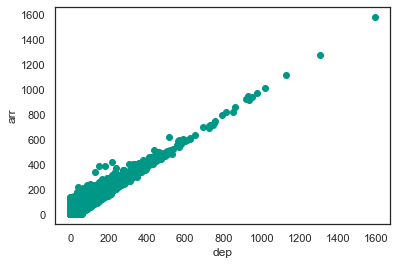

0.9652923293951806 0.0
Reject Null Hypothesis


In [12]:
from scipy.stats import pearsonr

#Null hypothesis: There is no relation between departure and arrival delay
#Alt hypothesis: There is relation between departure and arrival delay

# Plotting Scatterplot
plt.scatter(x = raw_data_nmv['Departure Delay in Minutes'], y = raw_data_nmv['Arrival Delay in Minutes']);
plt.xlabel('dep');
plt.ylabel('arr');
plt.show()


corr, p_val = pearsonr(raw_data_nmv['Departure Delay in Minutes'], raw_data_nmv['Arrival Delay in Minutes'])
print(corr,p_val)
if p_val < 0.05:
   print ('Reject Null Hypothesis')
else:
   print ('Retain Null Hypothesis')

In [13]:
eq= raw_data_nmv['Departure Delay in Minutes'] == raw_data_nmv['Arrival Delay in Minutes']

In [14]:
eq.value_counts() # Approximately 50%

False    68405
True     61042
dtype: int64

In [15]:
raw_data_nmv['diff'] = raw_data_nmv['Arrival Delay in Minutes'] - raw_data_nmv['Departure Delay in Minutes']

In [16]:
raw_data_nmv['diff'].describe()

count    129447.000000
mean          0.447542
std          10.078913
min         -54.000000
25%          -2.000000
50%           0.000000
75%           0.000000
max         234.000000
Name: diff, dtype: float64

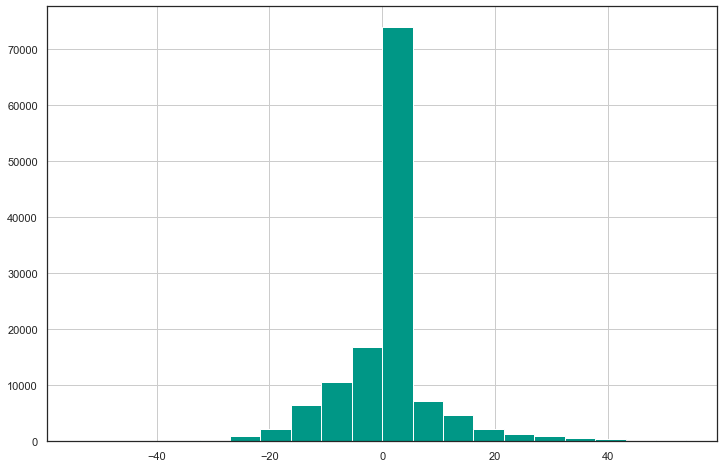

In [17]:
raw_data_nmv['diff'].hist(bins=20,range = [-54,54],figsize=(12,8))

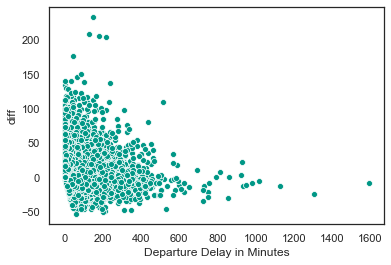

In [18]:
sns.scatterplot(raw_data_nmv['Departure Delay in Minutes'], raw_data_nmv['diff'])

In [19]:
arr_delay_eq = raw_data_nmv.loc[(raw_data_nmv['Departure Delay in Minutes'] == 0) 
                                & (raw_data_nmv['Arrival Delay in Minutes'] == 0)]
len(arr_delay_eq.index)
print("% of rows where Depature Delay and Arrival delay equal to zero:", round(len(arr_delay_eq.index)/len(raw_data_nmv.index)*100,2),"%")

% of rows where Depature Delay and Arrival delay equal to zero: 45.84 %


In [20]:
arr_delay_eq['Flight Distance'].mean()

1169.6850257015253

In [21]:
arr_delay_eq['Flight Distance'].describe()

count    59335.000000
mean      1169.685026
std       1007.622131
min         31.000000
25%        397.000000
50%        797.000000
75%       1730.000000
max       4983.000000
Name: Flight Distance, dtype: float64

In [22]:
arr_delay_mv = raw_data.loc[(raw_data['Departure Delay in Minutes'] == 0) & (raw_data['Arrival Delay in Minutes'].isnull())]
arr_delay_mv[arr_delay_mv['Flight Distance'] <= 1169]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
5296,Female,Loyal Customer,47,Personal Travel,Eco,834,1.0,1.0,1.0,3.0,...,3.0,3.0,1.0,2.0,4.0,3.0,2.0,0,NaN,0
7225,Male,Loyal Customer,48,Business travel,Business,391,1.0,1.0,1.0,1.0,...,5.0,5.0,5.0,5.0,4.0,5.0,5.0,0,NaN,1
9060,Male,Loyal Customer,51,Personal Travel,Eco,160,1.0,5.0,1.0,2.0,...,4.0,3.0,4.0,5.0,4.0,5.0,4.0,0,NaN,0
9481,Female,Loyal Customer,44,Business travel,Business,678,1.0,1.0,1.0,1.0,...,3.0,3.0,3.0,3.0,5.0,3.0,4.0,0,NaN,1
9551,Male,Loyal Customer,70,Personal Travel,Eco,298,2.0,4.0,2.0,3.0,...,1.0,3.0,2.0,4.0,3.0,5.0,1.0,0,NaN,0
10880,Female,Loyal Customer,58,Personal Travel,Eco,1076,1.0,4.0,1.0,3.0,...,4.0,4.0,1.0,5.0,4.0,4.0,3.0,0,NaN,0
16329,Male,Loyal Customer,39,Business travel,Business,396,3.0,3.0,5.0,3.0,...,3.0,3.0,3.0,3.0,5.0,3.0,3.0,0,NaN,1
18429,Male,Loyal Customer,56,Personal Travel,Eco,1087,3.0,1.0,3.0,3.0,...,2.0,1.0,2.0,3.0,2.0,3.0,2.0,0,NaN,0
19498,Female,disloyal Customer,21,Business travel,Eco,216,1.0,2.0,1.0,2.0,...,4.0,1.0,5.0,3.0,4.0,3.0,4.0,0,NaN,0
19971,Female,disloyal Customer,20,Business travel,Eco,551,5.0,0.0,5.0,1.0,...,5.0,5.0,4.0,5.0,5.0,2.0,5.0,0,NaN,1


In [23]:
# Imputing Arrival Delay with zero where flight distance <= 1169
idx = np.where((raw_data['Departure Delay in Minutes'] == 0) & (raw_data['Flight Distance'] <= 1169) 
               & (raw_data['Arrival Delay in Minutes'].isnull()))
data_imp_0 = raw_data.copy()
data_imp_0['Arrival Delay in Minutes'].loc[idx] = data_imp_0['Arrival Delay in Minutes'].loc[idx].fillna(0)

In [24]:
raw_data_missing= missing_values_table(data_imp_0)
raw_data_missing
# 97 missing values in arrival delay imputed with 0

The selected dataframe has 23 columns.
There are 15 columns that have missing values.


,Missing Values,% of Total Values
Arrival Delay in Minutes,296,0.2
Gate location,8,0.0
Online boarding,6,0.0
Food and drink,5,0.0
Inflight wifi service,4,0.0
Departure/Arrival time convenient,4,0.0
Inflight entertainment,4,0.0
Ease of Online booking,3,0.0
On-board service,3,0.0
Checkin service,3,0.0


In [25]:
# predicting arrival delay based on departure delay
from sklearn.linear_model import LinearRegression
X = raw_data_nmv['Departure Delay in Minutes'].values.reshape(-1,1)
Y = raw_data_nmv['Arrival Delay in Minutes'].values.reshape(-1,1)
linreg = LinearRegression()
model = linreg.fit(X,Y)
Yhat = model.predict(X)

from sklearn.metrics import r2_score
print("The R-squared for the imputer is :", round(r2_score(Y, Yhat),2))

The R-squared for the imputer is : 0.93


In [26]:
idx = np.where(data_imp_0['Arrival Delay in Minutes'].isnull())
X_dep = data_imp_0['Departure Delay in Minutes'].loc[idx].values.reshape(-1,1)
Y_pred = model.predict(X_dep)
arr_pred = Y_pred.reshape(296,)

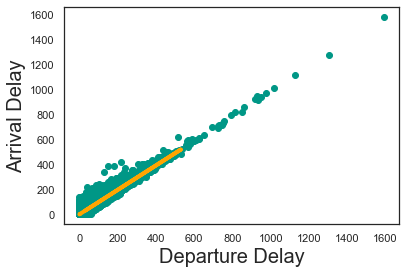

In [27]:
plt.scatter(X,Y)
fig = plt.plot(X_dep,Y_pred, lw=4, c='orange', label ='regression line')
plt.xlabel('Departure Delay',fontsize=20)
plt.ylabel('Arrival Delay',fontsize=20)
plt.show()

In [28]:
# our imputer will do fine as the model is a great fit

In [29]:
my_list = map(lambda x: x[0], Y_pred)
arr = pd.Series(my_list)

In [30]:
arr_val = pd.DataFrame({'Predicted Arrival': arr[:]})
arr_val.head()

,Predicted Arrival
0,31.101473
1,37.953365
2,11.524638
3,40.889890
4,1.736221


In [31]:
# imputing with predictions according to linreg
data_imp_0['Arrival Delay in Minutes'].loc[idx] = arr_pred

In [32]:
data_imp_0['Arrival Delay in Minutes'].isnull().sum()

0

In [33]:
# dropping rest of the missing values
data_nmv = data_imp_0.dropna()
data_nmv.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [34]:
data_nmv.head().T

,0,1,2,3,4
Gender,Male,Male,Female,Female,Male
Customer Type,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
Age,13,25,26,25,61
Type of Travel,Personal Travel,Business travel,Business travel,Business travel,Business travel
Class,Eco Plus,Business,Business,Business,Business
Flight Distance,460,235,1142,562,214
Inflight wifi service,3,3,2,2,3
Departure/Arrival time convenient,4,2,2,5,3
Ease of Online booking,3,3,2,5,3
Gate location,1,3,2,5,3


In [35]:
data_nmv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129840 entries, 0 to 129879
Data columns (total 23 columns):
Gender                               129840 non-null object
Customer Type                        129840 non-null object
Age                                  129840 non-null int64
Type of Travel                       129840 non-null object
Class                                129840 non-null object
Flight Distance                      129840 non-null int64
Inflight wifi service                129840 non-null float64
Departure/Arrival time convenient    129840 non-null float64
Ease of Online booking               129840 non-null float64
Gate location                        129840 non-null float64
Food and drink                       129840 non-null float64
Online boarding                      129840 non-null float64
Seat comfort                         129840 non-null float64
Inflight entertainment               129840 non-null float64
On-board service                     129840

In [38]:
data_nmv.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129840.0,39.429482,15.119227,7.0,27.0,40.0,51.0,85.0
Flight Distance,129840.0,1190.323167,997.456365,31.0,414.0,844.0,1744.0,4983.0
Inflight wifi service,129840.0,2.728812,1.329345,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129840.0,3.057694,1.526751,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,129840.0,2.756993,1.401754,0.0,2.0,3.0,4.0,5.0
Gate location,129840.0,2.977010,1.278550,0.0,2.0,3.0,4.0,5.0
Food and drink,129840.0,3.204798,1.329928,0.0,2.0,3.0,4.0,5.0
Online boarding,129840.0,3.252611,1.350747,0.0,2.0,3.0,4.0,5.0
Seat comfort,129840.0,3.441520,1.319225,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,129840.0,3.358141,1.334033,0.0,2.0,4.0,4.0,5.0


In [38]:
# segregating on the basis of measurement scale
ratio = data_nmv[['Age','Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes']]
nominal = data_nmv[['Gender','Customer Type','Type of Travel']]
ordinal = data_nmv[['Class']]
interval = data_nmv.iloc[:,6:20]

In [40]:
data_nmv[ratio.columns] = data_nmv[ratio.columns].astype('int64')

### Exploratory Data Analysis

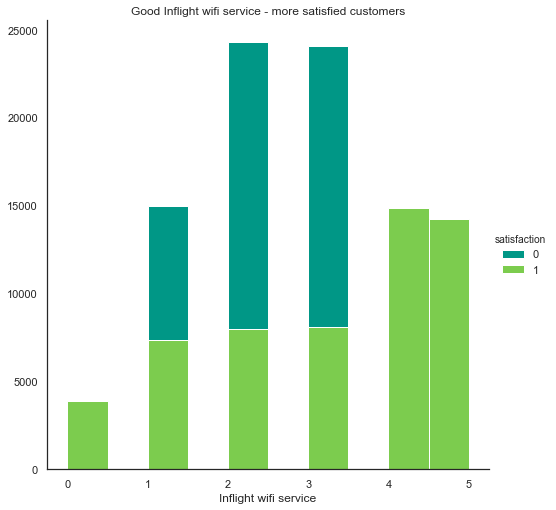

In [36]:
sns.FacetGrid(data_nmv, hue="satisfaction", size=7) \
.map(plt.hist, "Inflight wifi service") \
.add_legend()
plt.title('Good Inflight wifi service - more satisfied customers')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025B88B3D5F8>,
      dtype=object)

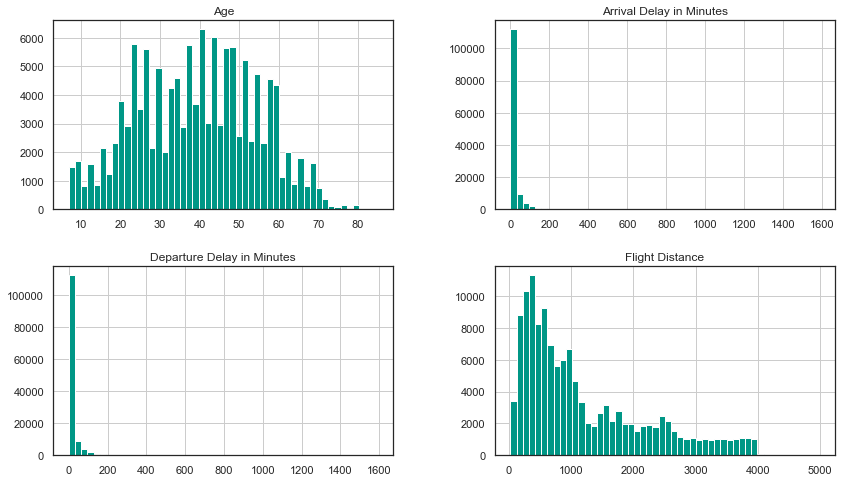

In [39]:
ratio.hist(bins=50,figsize = (14,8))

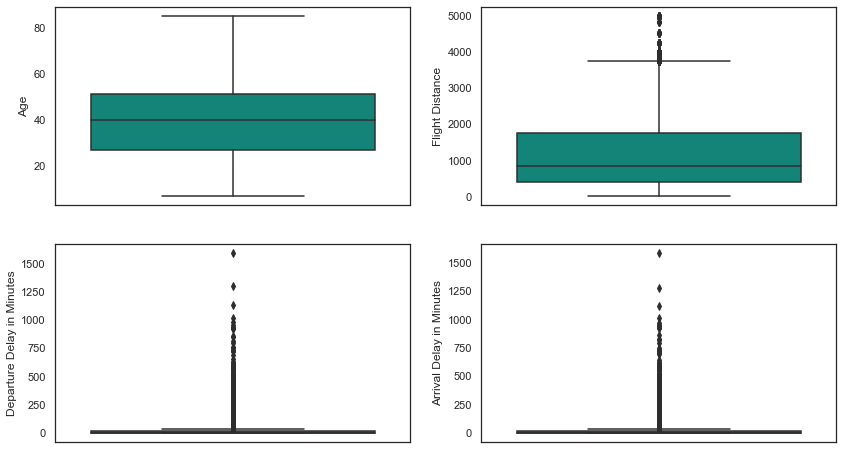

In [40]:
fig, ax = plt.subplots(2, 2, figsize=(14, 8))
for variable, subplot in zip(ratio, ax.flatten()):
    sns.boxplot(y = ratio[variable], ax=subplot)

In [44]:
# Apart from age all others have outliers. Number of outliers is huge in Departure and Arrival Delay.

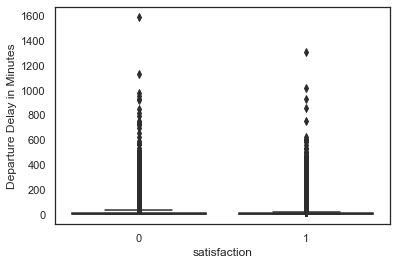

In [41]:
sns.boxplot(data_nmv['satisfaction'],data_nmv['Departure Delay in Minutes'])

In [43]:
x = np.log10((data_nmv['Departure Delay in Minutes'])+1)

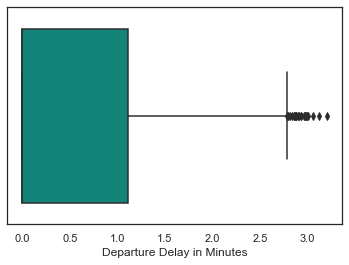

In [44]:
sns.boxplot(x)

In [48]:
#data_nmv['ln(Departure Delay in Minutes)'] = np.log10((data_nmv['Departure Delay in Minutes'])+1)

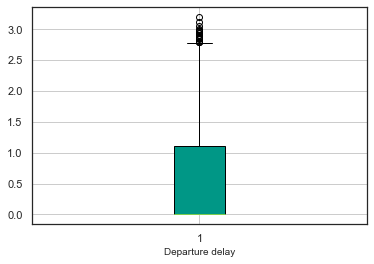

In [45]:
box = plt.boxplot(x , patch_artist=True);
plt.xlabel('Departure delay', fontsize=10);
plt.grid();

In [50]:
[whiskers.get_ydata()[0] for whiskers in box["whiskers"]]

[0.0, 1.1139433523068367]

In [51]:
[item.get_ydata()[0] for item in box['caps']]

[0.0, 2.7788744720027396]

In [52]:
[median.get_ydata()[0] for median in box["medians"]]

[0.0]

In [53]:
[flier.get_ydata()[0] for flier in box["fliers"]]

[3.115943176939055]

In [54]:
[flier.get_ydata() for flier in box["fliers"]]

[array([3.11594318, 2.81491318, 2.86153441, 2.93449845, 2.84073323,
        2.87563994, 2.79726754, 2.86332286, 2.93145787, 2.96894968,
        3.00774778, 2.96473092, 2.78604121, 2.87448182, 2.99078269,
        2.97034688, 3.20221578, 2.86033801, 2.97863695, 2.90036713,
        3.05269394, 2.91169016, 2.79588002, 2.87909588])]

In [55]:
#sns.distplot(data_nmv[data_nmv['satisfaction'] == 1]['ln(Departure Delay in Minutes)'],color = 'y',label = 'satisfaction: Yes')
#sns.distplot(data_nmv[data_nmv['satisfaction'] == 0]['ln(Departure Delay in Minutes)'],color = 'r',label = 'satisfaction: No');
#plt.legend();

In [56]:
data_nmv.to_csv("resolvr.csv", index = False)

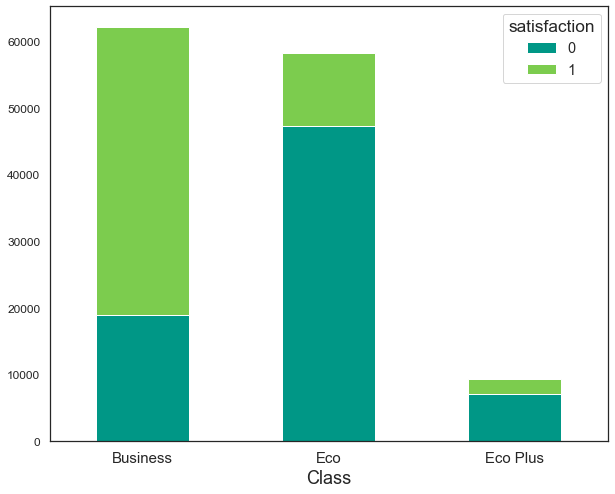

In [51]:
counts = data_nmv.groupby(['Class', 'satisfaction']).satisfaction.count().unstack()
counts.plot(kind='bar', stacked=True,figsize = (10,8), fontsize = 12)
plt.xticks(rotation=0,fontsize = 15)
plt.xlabel('Class', fontsize=18)
plt.rcParams['legend.title_fontsize'] = 'xx-large'
plt.legend(title="satisfaction",fontsize = "x-large",loc = 1)